<a href="https://colab.research.google.com/github/KhanhPhantxwes/Beats_By_Dre_DataAnalysis/blob/main/TextBox_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install textblob
from textblob import TextBlob
import pandas as pd
import numpy as np


## **Analyze Individual Sentences**

In [3]:
text = "The smartwatch is amazing, but the battery life could be better."
blob = TextBlob(text)

# Extract sentiment
print(blob.sentiment)

Sentiment(polarity=0.55, subjectivity=0.7)


## **Batch Processing with a Dataset**

The phrase "amazing" contributes positively, while "could be better" adds some negativity, balancing the overall polarity.

In [5]:

# Load dataset
df = pd.read_csv('/content/sample_data/smartwatch-reviews.csv')

# Preview the dataset
df.head()

,Product Name,Name,Stars,Title,Date,Description
0,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Karthikeyan,5.0,5.0 out of 5 stars\nGood and reliable watch.,NaN,Very good in terms of features and amazing qua...
1,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Vishvesh,4.0,4.0 out of 5 stars\nThe Perfect Budget Apple W...,NaN,This is the first time I am using an Apple Wat...
2,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Bindu,5.0,5.0 out of 5 stars\nGood One,NaN,Simple look with basic features.\nRead more
3,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Sandhyaram,2.0,2.0 out of 5 stars\nBattery problem,NaN,2h charging 100%\nRead more
4,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Suresh,1.0,1.0 out of 5 stars\nNot as per image,NaN,Screen is very small\nRead more


In [6]:
#Create a shorter product name for future visulisation
df['Product Name Short'] = df['Product Name'].str.split().str[:3].str.join(' ')
df['Product Name Short'].value_counts()

,count
Product Name Short,
Fitbit Inspire 2,650
Apple Watch SE,456
Apple Watch Series,400
"Garmin Forerunner 45,",384
"Garmin Forerunner 55,",290
Fossil Gen 6,220
Fitbit Versa 4,130
Fitbit Inspire 3,130
Garmin Vivoactive 3,90


In [7]:
df.head()

,Product Name,Name,Stars,Title,Date,Description,Product Name Short
0,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Karthikeyan,5.0,5.0 out of 5 stars\nGood and reliable watch.,NaN,Very good in terms of features and amazing qua...,Apple Watch SE
1,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Vishvesh,4.0,4.0 out of 5 stars\nThe Perfect Budget Apple W...,NaN,This is the first time I am using an Apple Wat...,Apple Watch SE
2,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Bindu,5.0,5.0 out of 5 stars\nGood One,NaN,Simple look with basic features.\nRead more,Apple Watch SE
3,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Sandhyaram,2.0,2.0 out of 5 stars\nBattery problem,NaN,2h charging 100%\nRead more,Apple Watch SE
4,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Suresh,1.0,1.0 out of 5 stars\nNot as per image,NaN,Screen is very small\nRead more,Apple Watch SE


## **1. Apply Sentiment Analysis**

In [10]:
# Create new columns for polarity and subjectivity
df['Polarity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Preview the updated dataset
df.head()

,Product Name,Name,Stars,Title,Date,Description,Product Name Short,Polarity,Subjectivity
0,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Karthikeyan,5.0,5.0 out of 5 stars\nGood and reliable watch.,NaN,Very good in terms of features and amazing qua...,Apple Watch SE,0.670000,0.726667
1,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Vishvesh,4.0,4.0 out of 5 stars\nThe Perfect Budget Apple W...,NaN,This is the first time I am using an Apple Wat...,Apple Watch SE,0.232418,0.478449
2,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Bindu,5.0,5.0 out of 5 stars\nGood One,NaN,Simple look with basic features.\nRead more,Apple Watch SE,0.166667,0.327381
3,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Sandhyaram,2.0,2.0 out of 5 stars\nBattery problem,NaN,2h charging 100%\nRead more,Apple Watch SE,0.500000,0.500000
4,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Suresh,1.0,1.0 out of 5 stars\nNot as per image,NaN,Screen is very small\nRead more,Apple Watch SE,0.087500,0.510000


## **2. Visualize Sentiment Scores**

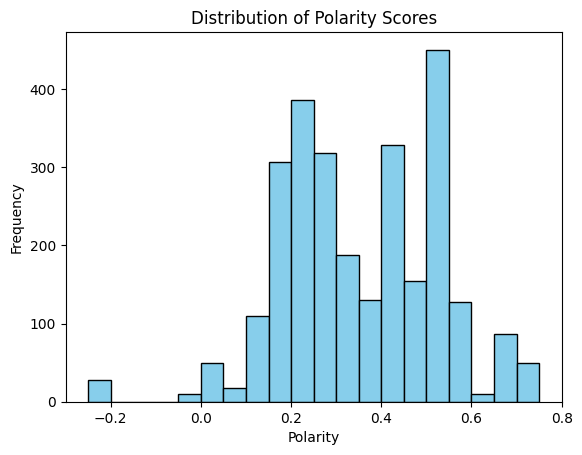

In [11]:
import matplotlib.pyplot as plt

# Plot histogram of polarity
plt.hist(df['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

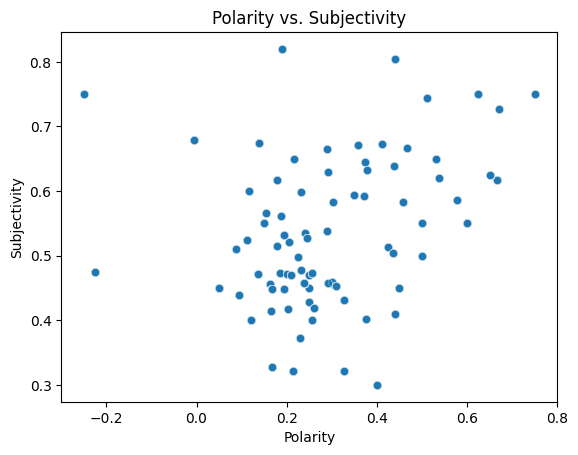

In [12]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x='Polarity', y='Subjectivity', data=df, alpha=0.5)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

## **3. Categorize Reviews**

In [13]:
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['Sentiment'] = df['Polarity'].apply(categorize_sentiment)

# Count the number of each sentiment
print(df['Sentiment'].value_counts())

Sentiment
Positive    2228
Neutral      494
Negative      28
Name: count, dtype: int64


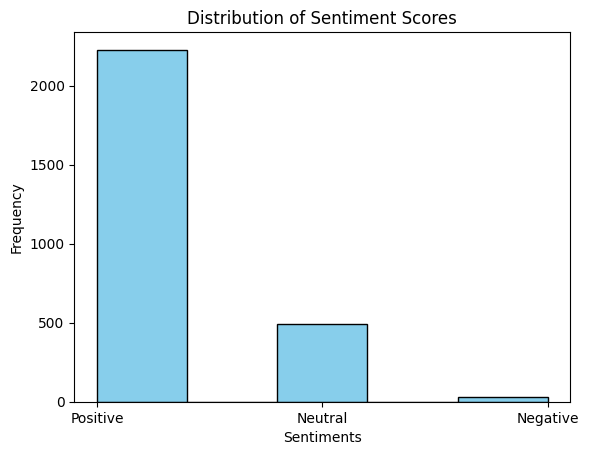

In [17]:

# Plot histogram of Sentiment
plt.hist(df['Sentiment'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiments")
plt.ylabel("Frequency")
plt.show()

## **4. Extract Key Insights**

**What do customers love most?**
Filter positive reviews and look for common phrases using a word cloud.
**What are the major complaints?**
Analyze negative reviews for recurring themes like "battery life" or "price."
Generate a Word Cloud

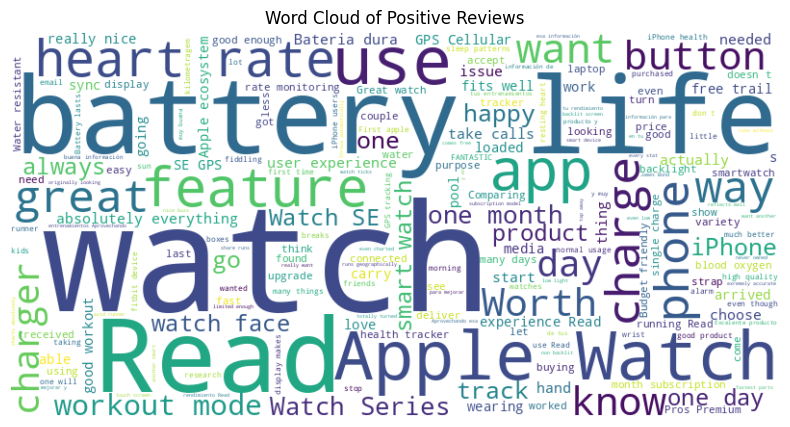

In [19]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews

#To create one long string by combining all "Positive" reviews from the Description column of a DataFrame.
positive_reviews = " ".join(df[df['Sentiment'] == 'Positive']['Description'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

## **5. Save Your Results**

What to Look For: Words like "battery," "design," or "performance" might dominate, highlighting popular features.

In [20]:
# Save updated dataset
df.to_csv('smartwatch_reviews_with_sentiment.csv', index=False)